# **Import Library**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Library untuk Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

# Library untuk Normalisasi Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Library Untuk Build Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

# **Business Understanding**

## Business Objective

Tujuan dari proyek ini adalah untuk membantu pemerintah Kanada dalam mengidentifikasi sumber utama emisi gas rumah kaca di negara mereka. Dengan pemahaman yang lebih baik tentang sumber-sumber utama emisi, pemerintah dapat merancang kebijakan yang lebih efektif untuk mengurangi emisi dan memenuhi komitmen mereka terhadap perubahan iklim global.

## Asses Situations

Kanada adalah salah satu negara dengan emisi gas rumah kaca yang tinggi, terutama karena industri minyak dan gas serta sektor transportasi yang besar. Untuk mengurangi dampak perubahan iklim, pemerintah Kanada membutuhkan pemahaman yang lebih mendalam tentang sumber-sumber utama emisi tersebut. Saat ini, data yang ada mungkin tersebar dan sulit untuk diolah secara efektif. Oleh karena itu, diperlukan pendekatan klasifikasi yang tepat untuk mengidentifikasi sumber-sumber utama emisi ini.

## Data Mining Goals



*  Mengidentifikasi sumber-sumber utama emisi gas rumah kaca di Kanada.
*  Membuat model klasifikasi yang dapat mengklasifikasikan jenis emisi berdasarkan data yang ada.


## Project Plan



*  Pengumpulan Data: Mengumpulkan data yang relevan tentang emisi gas rumah kaca di Kanada dari berbagai sumber seperti lembaga pemerintah, organisasi lingkungan, dan industri terkait.
*   Persiapan Data: Membersihkan dan mempersiapkan data untuk analisis, termasuk penghapusan nilai yang hilang, normalisasi data, dan pemrosesan lainnya.
*   Eksplorasi Data: Menganalisis dan memahami pola-pola dalam data, serta menjelajahi hubungan antara variabel-variabel yang relevan.
*   Pembuatan Model: Membangun model klasifikasi menggunakan teknik seperti decision tree, GNB, atau KNN untuk mengidentifikasi sumber-sumber utama emisi.
*   Evaluasi Model: Mengukur kinerja model menggunakan metrik yang sesuai seperti akurasi, presisi, recall, dan F1-score.
*   Interpretasi Hasil: Menganalisis hasil dari model untuk mengidentifikasi sumber-sumber utama emisi dan menganalisis kontribusi sektor-sektor tertentu.








# **Data Understanding**

## Collect Initial Data

In [ ]:
df = pd.read_csv('greenhouse.csv') #masukin data kalian di sini
df

,Federal organization,Fiscal year,GHG source,GHG scope,Energy category,Energy use (GJ),Emissions (kt)
0,Agriculture and Agri-Food Canada,2005-06,facilities,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",2134.89,0.15
1,Agriculture and Agri-Food Canada,2005-06,fleet,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",41332.38,2.92
2,Agriculture and Agri-Food Canada,2005-06,facilities,2,district heating,154568.00,11.30
3,Agriculture and Agri-Food Canada,2005-06,facilities,2,electricity,524494.54,54.28
4,Agriculture and Agri-Food Canada,2005-06,fleet,1,fuels with renewable content,14431.98,0.59
...,...,...,...,...,...,...,...
2070,Transport Canada,2022-23,facilities,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",17335.13,1.23
2071,Transport Canada,2022-23,facilities,1,natural gas,21416.88,1.08
2072,Transport Canada,2022-23,fleet,1,gasoline,20859.15,1.38
2073,Transport Canada,2022-23,facilities,1,liquified petroleum gas,2522.95,0.15


Pada Collect Initial Data berfungsi untuk menampilkan isi pada Dataset

## Describe Data

Describe data adalah langkah awal dalam proses ini. Ini melibatkan pemahaman mendalam tentang karakteristik, struktur, dan kualitas data yang akan dianalisis.

In [ ]:
print("Baris: ", df.shape[0])
print("Kolom: ", df.shape[1])

Baris:  2075
Kolom:  7


Bisa kita lihat pada hasil code diatas untuk menampilkan jumlah baris dan kolom yaitu dengan jumlah baris 2075 dan kolom 7

In [ ]:
df.columns

Index(['Federal organization', 'Fiscal year', 'GHG source', 'GHG scope',
       'Energy category', 'Energy use (GJ)', 'Emissions (kt)'],
      dtype='object')

Code diatas berfungsi untuk menampilkan 7 kolom pada dataset yang berisikan 'Federal organization', 'Fiscal year', 'GHG source', 'GHG scope', 'Energy category', 'Energy use (GJ)', 'Emissions (kt)'

In [ ]:
df.dtypes

Federal organization     object
Fiscal year              object
GHG source               object
GHG scope                 int64
Energy category          object
Energy use (GJ)         float64
Emissions (kt)          float64
dtype: object

Code diatas berfungsi untuk menampilkan bermacam-macam tipe data yang digunakan pada 7 kolom di dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Federal organization  2075 non-null   object 
 1   Fiscal year           2075 non-null   object 
 2   GHG source            2075 non-null   object 
 3   GHG scope             2075 non-null   int64  
 4   Energy category       2075 non-null   object 
 5   Energy use (GJ)       2075 non-null   float64
 6   Emissions (kt)        2075 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 113.6+ KB


Code diatas berfungsi untuk menampilkan tipe data, berbeda dengan code diatas karena code ini lebih detail menjelaskannya

In [ ]:
df['Emissions (kt)'] = df['Emissions (kt)'].astype(int)

In [ ]:
df['Energy use (GJ)'] = df['Energy use (GJ)'].astype(int)

Code diatas berfungsi untuk mengubah tipe data menjadi integer dan hasilnya bisa dilihat dibawah

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Federal organization  2075 non-null   object
 1   Fiscal year           2075 non-null   object
 2   GHG source            2075 non-null   object
 3   GHG scope             2075 non-null   int64 
 4   Energy category       2075 non-null   object
 5   Energy use (GJ)       2075 non-null   int64 
 6   Emissions (kt)        2075 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 113.6+ KB


In [ ]:
df.describe()

,GHG scope,Energy use (GJ),Emissions (kt)
count,2075.000000,2.075000e+03,2075.000000
mean,1.171566,1.552480e+05,7.624096
std,0.377094,6.232033e+05,31.542358
min,1.000000,0.000000e+00,0.000000
25%,1.000000,7.665000e+02,0.000000
50%,1.000000,9.789000e+03,0.000000
75%,1.000000,6.215900e+04,3.000000
max,2.000000,6.453502e+06,327.000000


Code diatas berfungsi untuk  menampilkan hasil statistik deskriptif dari kolom numerik yang ada pada dataset.

In [ ]:
df.corr(numeric_only = True)

,GHG scope,Energy use (GJ),Emissions (kt)
GHG scope,1.000000,0.161291,0.133885
Energy use (GJ),0.161291,1.000000,0.946046
Emissions (kt),0.133885,0.946046,1.000000


Code menampilkan hasil korelasi antara beberapa variabel dalam sebuah data frame. Variabel yang tercantum adalah "GHG scope", "Energy use (GJ)", dan "Emissions (kt)". Setiap sel menunjukkan koefisien korelasi antara dua variabel yang terkait. Koefisien korelasi berkisar dari -1 hingga 1, di mana nilai 1 menunjukkan korelasi positif sempurna, nilai -1 menunjukkan korelasi negatif sempurna, dan nilai 0 menunjukkan tidak adanya korelasi. Dari hasil yang ditampilkan, dapat dilihat bahwa "Energy use (GJ)" memiliki korelasi positif yang cukup kuat dengan "Emissions (kt)", sedangkan "GHG scope" memiliki korelasi yang lemah dengan keduanya.

In [ ]:
px.imshow(df.corr(numeric_only = True))

Visualisasi ini menggunakan representasi heatmap, di mana setiap sel dalam matriks dipenuhi dengan warna yang sesuai dengan nilai korelasi antara pasangan variabel yang terkait.

Variabel yang dianalisis adalah "GHG scope", "Energy use (GJ)", dan "Emissions (kt)". Setiap variabel direpresentasikan oleh sumbu x dan y dalam heatmap. Warna dari setiap sel menggambarkan kekuatan korelasi antara pasangan variabel yang sesuai, di mana warna yang lebih terang menunjukkan korelasi positif yang lebih kuat, sedangkan warna yang lebih gelap menunjukkan korelasi yang lebih lemah.

Dari visualisasi ini, kita dapat melihat bahwa ada korelasi positif yang kuat antara "Energy use (GJ)" dan "Emissions (kt)", yang tercermin dalam warna kuning terang di sel yang sesuai. Selain itu, korelasi antara "GHG scope" dan "Emissions (kt)" juga tampak positif, meskipun dengan kekuatan yang sedikit lebih lemah, ditandai oleh warna kuning yang sedikit lebih gelap.

# **Exploratory Data Analysis (EDA)**

Fungsi Exploratory Data Analysis (EDA) adalah serangkaian proses analisis yang dilakukan untuk memahami struktur, pola, dan karakteristik data secara visual dan deskriptif. EDA merupakan langkah awal yang penting dalam proses analisis data dan dapat memberikan wawasan yang berharga tentang dataset sebelum melakukan analisis lebih lanjut atau membangun model.

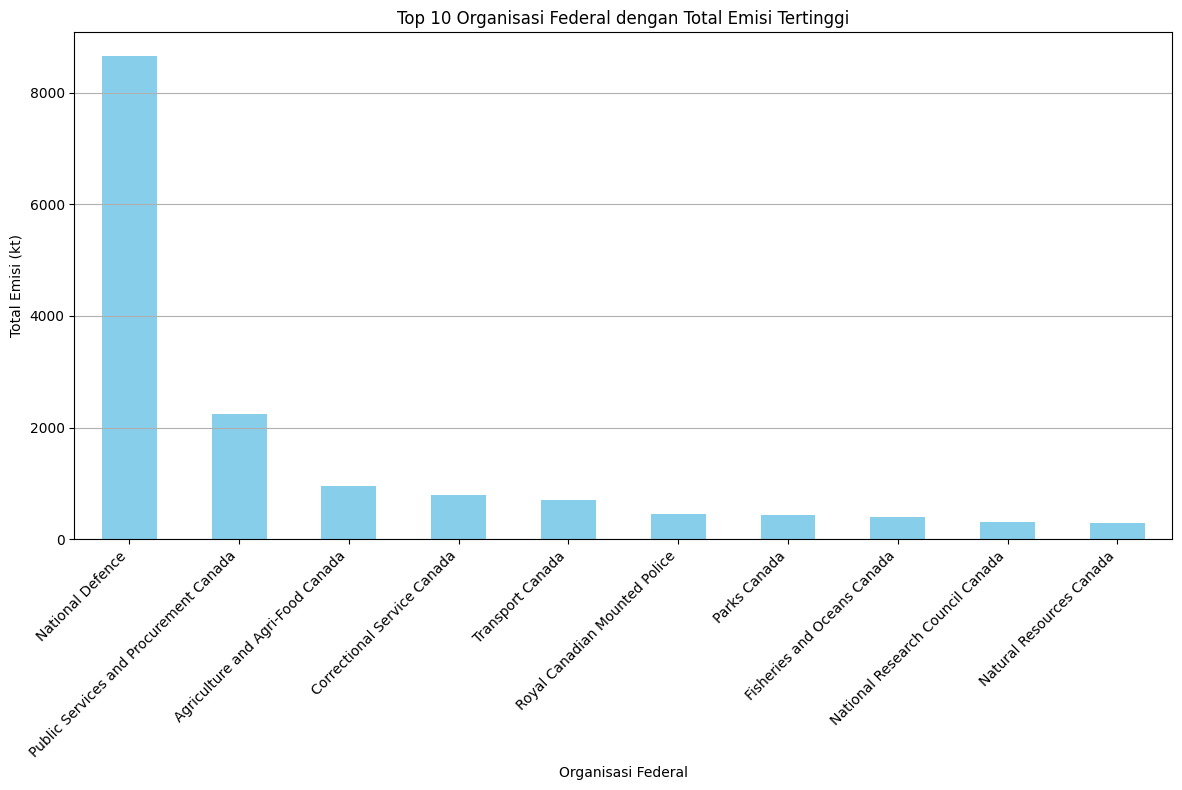

In [ ]:
# Menyiapkan data
data = df.groupby('Federal organization')['Emissions (kt)'].sum()
data_sorted = data.sort_values(ascending=False).head(10)

# Membuat bar plot
plt.figure(figsize=(12, 8))
data_sorted.plot(kind='bar', color='skyblue')
plt.title('Top 10 Organisasi Federal dengan Total Emisi Tertinggi')
plt.xlabel('Organisasi Federal')
plt.ylabel('Total Emisi (kt)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Menampilkan bar plot
plt.tight_layout()
plt.show()


Dari visualisasi ini, terlihat bahwa "National Defence" memiliki total emisi tertinggi di antara 10 organisasi federal yang ditampilkan dalam data. Sedangkan organisasi "Natural Resource Canada" memiliki total emisi terendah di antara 10 organisasi tersebut.

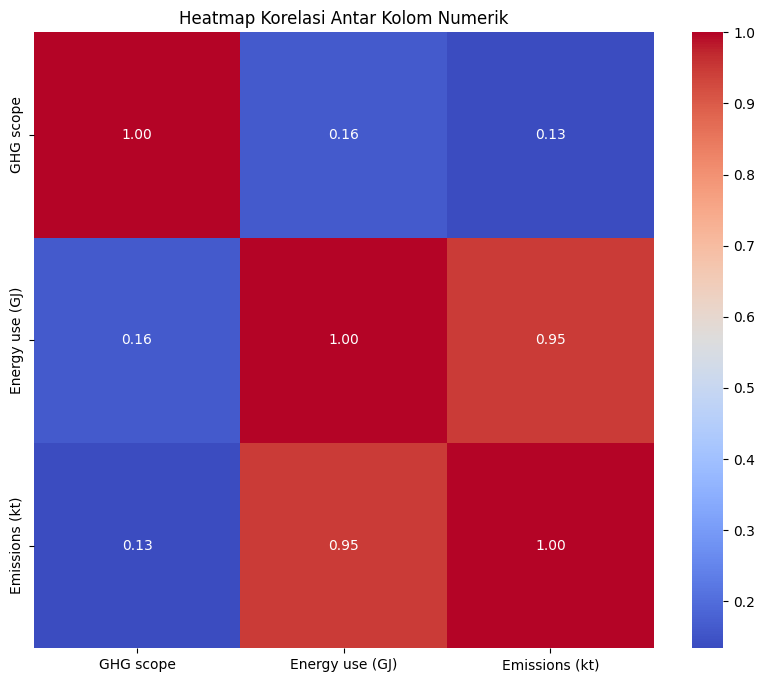

In [ ]:
# Menyiapkan data (asumsi df adalah DataFrame yang berisi data yang diberikan)
# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Membuat matriks korelasi
correlation_matrix = numeric_df.corr()

# Plotting heatmap untuk menampilkan korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Heatmap Korelasi Antar Kolom Numerik')
plt.show()

Visualisasi berikut adalah sebuah heatmap yang menggambarkan matriks korelasi antara kolom-kolom numerik dalam suatu dataset. Setiap sel dalam heatmap menunjukkan nilai korelasi antara dua kolom yang sesuai.

Kolom-kolom yang dianalisis dalam heatmap ini adalah "GHG scope", "Energy use (GJ)", dan "Emissions (kt)". Korelasi antara kolom "GHG scope" dan "Energy use (GJ)" adalah 0.16, antara "GHG scope" dan "Emissions (kt)" adalah 0.13, dan antara "Energy use (GJ)" dan "Emissions (kt)" adalah 0.95.

Warna dari setiap sel menunjukkan kekuatan korelasi, di mana warna biru menunjukkan korelasi negatif, warna merah menunjukkan korelasi positif, dan intensitas warna mencerminkan kekuatan korelasi. Dari heatmap ini, dapat dilihat bahwa "Energy use (GJ)" dan "Emissions (kt)" memiliki korelasi positif yang kuat, ditunjukkan oleh warna merah yang intens di antara kedua kolom tersebut. Sedangkan "GHG scope" memiliki korelasi yang lemah dengan kedua kolom lainnya, ditunjukkan oleh warna yang mendekati biru atau merah yang lebih gelap.

<Axes: ylabel='count'>

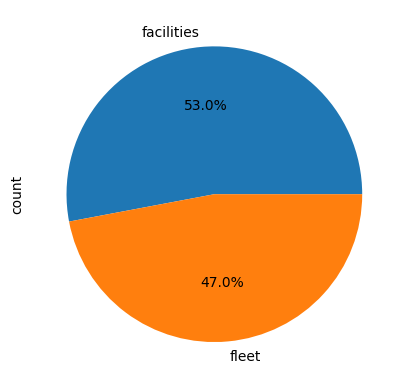

In [ ]:
From_counts = df['GHG source'].value_counts()
From_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360)

Visualisasi tersebut adalah sebuah diagram lingkaran (pie chart) yang menunjukkan proporsi data antara dua kategori, yaitu "facilities" dan "fleet" dari kolom "GHG source". Setiap bagian dari diagram lingkaran mewakili persentase dari total data.

Dari diagram ini, terlihat bahwa kategori "facilities" memegang proporsi lebih besar dari total data, sebesar 53%, sedangkan kategori "fleet" memiliki proporsi sebesar 47%. Diagram lingkaran digunakan untuk dengan jelas memvisualisasikan proporsi atau persentase dari suatu kategori dalam sebuah dataset. Dalam hal ini, warna biru mewakili kategori "facilities", sementara warna oranye mewakili kategori "fleet".

# **Verify Data Quality**

Fungsi "verify data quality" merujuk pada serangkaian tindakan atau proses yang dilakukan untuk memeriksa kualitas data sebelum dilakukan analisis atau pemrosesan lebih lanjut. Tujuan dari fungsi ini adalah untuk memastikan bahwa data yang digunakan adalah berkualitas tinggi, konsisten, dan dapat diandalkan untuk pengambilan keputusan yang akurat.

## missing values

In [ ]:
# Memeriksa adanya nilai yang hilang
missing_values = df.isnull().sum()

# Menampilkan jumlah nilai yang hilang untuk setiap kolom
print("Jumlah nilai yang hilang untuk setiap kolom:")
print(missing_values)

# Menampilkan persentase nilai yang hilang untuk setiap kolom
total_cells = df.shape[0] * df.shape[1]
total_missing = missing_values.sum()
percentage_missing = (total_missing / total_cells) * 100
print("\nPersentase nilai yang hilang dalam dataset: {:.2f}%".format(percentage_missing))#Tambahkan kode untuk mengecek apakah ada nilai kosong pada tiap kolom di dataset kalian ya

Jumlah nilai yang hilang untuk setiap kolom:
Federal organization    0
Fiscal year             0
GHG source              0
GHG scope               0
Energy category         0
Energy use (GJ)         0
Emissions (kt)          0
dtype: int64

Persentase nilai yang hilang dalam dataset: 0.00%


Bedasarkan hasil analisis data diatas tidak terdapat missing values. Fungsi missing values dalam konteks ini adalah untuk melakukan analisis terhadap data dan mengidentifikasi apakah ada nilai yang hilang (missing values) dalam dataset.

## outliers values

In [ ]:
# Fungsi untuk mendeteksi outliers menggunakan metode IQR (Interquartile Range)
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Deteksi outliers untuk setiap kolom numerik
outliers_df = df.select_dtypes(include=['int64', 'float64']).apply(detect_outliers)

# Hitung persentase outliers
outliers_percentage = (outliers_df.sum() / len(df)) * 100

# Tampilkan hasil
print("Persentase Outliers dalam Dataset:")
outliers_percentage


Persentase Outliers dalam Dataset:


GHG scope          17.156627
Energy use (GJ)    13.445783
Emissions (kt)     13.927711
dtype: float64


Fungsi outliers values digunakan untuk mendeteksi nilai-nilai outlier dalam sebuah dataset menggunakan metode IQR (Interquartile Range).Hasilnya menunjukkan bahwa persentase nilai yang dianggap outlier adalah 17.15627% untuk kolom "GHG scope", 13.445783% untuk kolom "Energy use (GJ)", dan 13.927711% untuk kolom "Emissions (kt)". Dengan informasi ini, outliers tidak perlu dihapus dikarenakan hasil menunjukan diatas 10%. Jika dibawah maka harus dihapus atau diimputasi

## duplicate values

In [ ]:
# Periksa keberadaan nilai-nilai yang diduplikasi
duplicate_rows = df[df.duplicated()]

# Tampilkan hasil
print("Jumlah nilai yang diduplikasi dalam dataset:", len(duplicate_rows))


Jumlah nilai yang diduplikasi dalam dataset: 1


Fungsi duplicate values digunakan untuk memeriksa keberadaan nilai-nilai yang duplikasi dalam sebuah dataset. Hasilnya menunjukkan bahwa terdapat 1 nilai yang diduplikasi dalam dataset. Dengan informasi ini, analis data dapat melakukan tindakan yang sesuai, seperti menghapus nilai-nilai duplikasi tersebut

# **Data Cleaning**

Fungsi Data Cleaning merujuk pada serangkaian tindakan atau proses yang dilakukan untuk membersihkan dan mempersiapkan data mentah agar dapat digunakan secara efektif untuk analisis atau pemrosesan lebih lanjut. Proses ini sangat penting karena data mentah seringkali tidak sempurna, mengandung noise, atau memiliki format yang tidak sesuai.

## missing values

In [ ]:
print((df.isna().sum() / len(df)) * 100)

Federal organization    0.0
Fiscal year             0.0
GHG source              0.0
GHG scope               0.0
Energy category         0.0
Energy use (GJ)         0.0
Emissions (kt)          0.0
dtype: float64


## duplicate values

In [ ]:
df[df.duplicated()]

,Federal organization,Fiscal year,GHG source,GHG scope,Energy category,Energy use (GJ),Emissions (kt)
1415,Natural Resources Canada,2019-20,fleet,1,fuels with renewable content,15,0


In [ ]:
df = df.drop_duplicates()

In [ ]:
# Periksa keberadaan nilai-nilai yang diduplikasi
duplicate_rows = df[df.duplicated()]

# Tampilkan hasil
print("Jumlah nilai yang diduplikasi dalam dataset:", len(duplicate_rows))


Jumlah nilai yang diduplikasi dalam dataset: 0


Pemeriksaan Duplikasi: Baris kode pertama menggunakan metode duplicated() pada DataFrame (df) untuk mengidentifikasi baris-baris yang memiliki nilai yang sama persis dengan baris lain dalam dataset. Hasilnya adalah sebuah Series boolean, di mana nilai True menunjukkan bahwa baris tersebut adalah duplikat. Dalam baris ke-1415 merupakan duplikat dari baris lain dalam dataset.

Penghapusan Duplikasi: Baris kode kedua menggunakan metode drop_duplicates() pada DataFrame (df) untuk menghapus baris-baris yang memiliki nilai yang sama persis dengan baris lain dalam dataset. Hasilnya adalah DataFrame baru (df) yang tidak memiliki nilai-nilai yang diduplikasi. Dalam baris duplikat telah dihapus sehingga tidak ada lagi nilai yang diduplikasi dalam dataset.

## Finding Outliers values

### Pengecekan Outliers

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
GHG scope,17.164899
Energy use (GJ),13.452266
Emissions (kt),13.934426


# **Construct Data**

In [ ]:
def categorize_energy_use(energy_use):
    if energy_use < 10000:
        return 'Low'
    elif 10000 <= energy_use < 1000000:
        return 'Moderate'
    else:
        return 'High'

df['Energy use category'] = df['Energy use (GJ)'].apply(categorize_energy_use)


<ipython-input-258-e102d3859899>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fungsi categorize_energy_use: Ini adalah sebuah fungsi Python yang menerima parameter energy_use. Fungsi ini bertujuan untuk mengategorikan penggunaan energi berdasarkan nilai energy_use. Jika nilai energy_use kurang dari 10000, maka akan dikategorikan sebagai "Low". Jika nilainya antara 10000 dan 100000, akan dikategorikan sebagai "Moderate". Sedangkan jika nilainya lebih dari 100000, akan dikategorikan sebagai "High". Kemudian, hasil kategorisasi tersebut disimpan dalam kolom baru dengan nama "Energy use category" dalam DataFrame yang diberi nama df.

In [ ]:
df.loc[:, 'Data_present'] = df[['Fiscal year', 'GHG source']].notnull().any(axis=1)

<ipython-input-259-b1cfad8c31f4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Penambahan Kolom "Data_present": Baris kode ini menambahkan kolom baru dengan nama "Data_present" ke dalam DataFrame yang sama (df). Kolom ini berisi nilai 1 untuk setiap baris yang ada dalam DataFrame, menunjukkan bahwa data ada atau tersedia untuk baris tersebut.

In [ ]:
df.head()

,Federal organization,Fiscal year,GHG source,GHG scope,Energy category,Energy use (GJ),Emissions (kt),Energy use category,Data_present
0,Agriculture and Agri-Food Canada,2005-06,facilities,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",2134,0,Low,True
1,Agriculture and Agri-Food Canada,2005-06,fleet,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",41332,2,Moderate,True
2,Agriculture and Agri-Food Canada,2005-06,facilities,2,district heating,154568,11,Moderate,True
3,Agriculture and Agri-Food Canada,2005-06,facilities,2,electricity,524494,54,Moderate,True
4,Agriculture and Agri-Food Canada,2005-06,fleet,1,fuels with renewable content,14431,0,Moderate,True


# **Data Reductions**

Fungsi "Construct Data" merupakan istilah yang umumnya digunakan dalam konteks pengolahan data atau analisis data. Meskipun tidak ada definisi tunggal yang bersifat mutlak, namun secara umum, "Construct Data" merujuk pada serangkaian langkah atau proses yang bertujuan untuk membentuk atau membuat dataset yang siap untuk dianalisis.

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

Grafik yang ditampilkan adalah sebuah heatmap yang menunjukkan korelasi antara berbagai kolom numerik dalam sebuah dataset. Berikut adalah interpretasi untuk setiap bagian dari heatmap ini:

- **GHG Scope (Greenhouse Gas Scope)**: Terletak di bagian kiri atas, kotak ini menunjukkan korelasi antara GHG Scope dengan dirinya sendiri. Korelasi ini tentu saja sempurna dan bernilai 1.

- **Energy use (GJ)**: Kotak di sebelah kanan atas menunjukkan korelasi antara Energy use (GJ) dengan GHG Scope dan Energy use sendiri. Terlihat bahwa Energy use (GJ) memiliki korelasi positif yang cukup tinggi dengan GHG Scope dan korelasi yang kuat dengan dirinya sendiri.

- **Emissions (kt)**: Terletak di tengah, kotak ini menunjukkan korelasi antara Emissions (kt) dengan GHG Scope, Energy use (GJ), dan dirinya sendiri. Terlihat bahwa Emissions (kt) memiliki korelasi positif yang tinggi dengan GHG Scope dan Energy use (GJ), serta memiliki korelasi yang sangat kuat dengan dirinya sendiri.

- **Data Present**: Kotak di sebelah kanan bawah menunjukkan korelasi antara Data Present dengan GHG Scope, Energy use (GJ), Emissions (kt), dan dirinya sendiri. Ini adalah kolom yang menunjukkan apakah data tersedia atau tidak. Dalam hal ini, tidak terlalu relevan untuk melihat korelasi dengan kolom lain karena nilainya hanya menunjukkan keberadaan data (1) atau ketidakberadaan data (0).

In [ ]:
df = df.drop(['Energy category'], axis=1)

# **Data Transformations**


Transformasi data adalah proses mengubah data dari satu bentuk atau format ke bentuk atau format lain yang lebih sesuai untuk analisis atau penggunaan tertentu. Fungsi transformasi data dapat dilakukan untuk berbagai tujuan

## Data Before mapping

Code dibawah berfungsi untuk menyimpan data/membuat data sebelum di mapping

In [ ]:
df.to_csv('data-before-mapping.csv', index=False)

In [ ]:
df

,Federal organization,Fiscal year,GHG source,GHG scope,Energy use (GJ),Emissions (kt),Energy use category,Data_present
0,Agriculture and Agri-Food Canada,2005-06,facilities,1,2134,0,Low,True
1,Agriculture and Agri-Food Canada,2005-06,fleet,1,41332,2,Moderate,True
2,Agriculture and Agri-Food Canada,2005-06,facilities,2,154568,11,Moderate,True
3,Agriculture and Agri-Food Canada,2005-06,facilities,2,524494,54,Moderate,True
4,Agriculture and Agri-Food Canada,2005-06,fleet,1,14431,0,Moderate,True
...,...,...,...,...,...,...,...,...
2070,Transport Canada,2022-23,facilities,1,17335,1,Moderate,True
2071,Transport Canada,2022-23,facilities,1,21416,1,Moderate,True
2072,Transport Canada,2022-23,fleet,1,20859,1,Moderate,True
2073,Transport Canada,2022-23,facilities,1,2522,0,Low,True


## Mapping

In [ ]:
# Definisikan pemetaan dari nama organisasi ke nilai integer
mapping = {
    'Agriculture and Agri-Food Canada': 1,
    'Canada Border Services Agency': 2,
    'Canada Revenue Agency': 3,
    'Canadian Food Inspection Agency': 4,
    'Canadian Forces Morale and Welfare Services': 5,
    'Canadian Space Agency': 6,
    'Correctional Service Canada': 7,
    'Crown-Indigenous Relations and Northern Affairs Canada': 8,
    'Employment and Social Development Canada': 9,
    'Environment and Climate Change Canada': 10,
    'Fisheries and Oceans Canada': 11,
    'Health Canada': 12,
    'Immigration, Refugees and Citizenship Canada': 13,
    'Indigenous Services Canada': 14,
    'Innovation, Science and Economic Development Canada': 15,
    'Library and Archives Canada': 16,
    'National Defence': 17,
    'National Research Council Canada': 18,
    'Natural Resources Canada': 19,
    'Parks Canada': 20,
    'Public Safety Canada': 21,
    'Public Services and Procurement Canada': 22,
    'Royal Canadian Mounted Police': 23,
    'Shared Services Canada': 24,
    'Transport Canada': 25
}

# Memetakan nilai pada kolom 'Federal organization' menggunakan pemetaan
df['Federal organization'] = df['Federal organization'].map(mapping)


Fungsi yang ditunjukkan dalam kode adalah untuk mendefinisikan pemetaan antara nama organisasi federal dengan nilai-nilai integer tertentu.Dengan demikian, setiap nama organisasi federal dalam kolom 'Federal organization' akan diganti dengan nilai integer yang sesuai berdasarkan pemetaan yang telah didefinisikan sebelumnya.

In [ ]:
df['Energy use category'] = df['Energy use category'].map({'Low': 0, 'Moderate': 1,'High': 2}).astype(int)

In [ ]:
df['GHG source'] = df['GHG source'].map({'facilities': 0, 'fleet': 1}).astype(int)

Baris kode tersebut bertujuan untuk mengubah nilai dalam kolom 'Energy use category' dan 'GHG source' menjadi nilai integer sesuai dengan kategori yang ditentukan.

In [ ]:
# Ekstrak tahun dari kolom 'Fiscal year'
df['Fiscal year'] = df['Fiscal year'].str.extract(r'(\d{4})')

# Ubah tipe data kolom 'Fiscal year' menjadi integer
df['Fiscal year'] = df['Fiscal year'].astype(int)


Baris kode tersebut bertujuan untuk melakukan dua operasi pada kolom 'Fiscal year' dalam DataFrame. Dengan demikian, baris kode tersebut akan menghasilkan kolom baru 'Fiscal year 1' yang berisi tahun yang diekstrak dari kolom 'Fiscal year', dan kolom 'Fiscal year' yang tipe datanya telah diubah menjadi integer.

In [ ]:
df.to_csv('data-mapping.csv', index=False)

In [ ]:
df

,Federal organization,Fiscal year,GHG source,GHG scope,Energy use (GJ),Emissions (kt),Energy use category,Data_present
0,1.0,2005,0,1,2134,0,0,True
1,1.0,2005,1,1,41332,2,1,True
2,1.0,2005,0,2,154568,11,1,True
3,1.0,2005,0,2,524494,54,1,True
4,1.0,2005,1,1,14431,0,1,True
...,...,...,...,...,...,...,...,...
2070,25.0,2022,0,1,17335,1,1,True
2071,25.0,2022,0,1,21416,1,1,True
2072,25.0,2022,1,1,20859,1,1,True
2073,25.0,2022,0,1,2522,0,0,True


## Encoding

In [ ]:
# df = pd.get_dummies(df)

In [ ]:
# df.head()

# **Modelling Predict**


Modelling prediction adalah salah satu tahap dalam proses analisis data yang melibatkan penggunaan model statistik atau algoritma machine learning untuk membuat prediksi atau estimasi terhadap variabel target berdasarkan variabel-variabel independen yang ada dalam dataset

## **Pipeline Model**

Pipeline model merupakan pendekatan dalam machine learning yang menggabungkan beberapa langkah pemrosesan data dan model ke dalam satu alur kerja yang terstruktur. Fungsi utamanya adalah untuk mengotomatiskan serangkaian langkah yang diperlukan dalam mempersiapkan data, membangun model, dan mengevaluasi performanya

In [ ]:
df.head()

,Federal organization,Fiscal year,GHG source,GHG scope,Energy use (GJ),Emissions (kt),Energy use category,Data_present
0,1.0,2005,0,1,2134,0,0,True
1,1.0,2005,1,1,41332,2,1,True
2,1.0,2005,0,2,154568,11,1,True
3,1.0,2005,0,2,524494,54,1,True
4,1.0,2005,1,1,14431,0,1,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2074 entries, 0 to 2074
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Federal organization  2033 non-null   float64
 1   Fiscal year           2074 non-null   int64  
 2   GHG source            2074 non-null   int64  
 3   GHG scope             2074 non-null   int64  
 4   Energy use (GJ)       2074 non-null   int64  
 5   Emissions (kt)        2074 non-null   int64  
 6   Energy use category   2074 non-null   int64  
 7   Data_present          2074 non-null   bool   
dtypes: bool(1), float64(1), int64(6)
memory usage: 131.7 KB


## Split Data

Fungsi split data merupakan tahap yang penting dalam proses analisis data, terutama saat menggunakan pendekatan machine learning. Proses ini melibatkan pembagian dataset menjadi dua atau lebih subset yang berbeda untuk tujuan

In [ ]:
# read csv data into pandas dataframe
df = pd.read_csv('data-mapping.csv')

In [ ]:
x = df.drop('GHG source', axis=1)
y = df['GHG source']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)

(1659, 7)
(415, 7)


In [ ]:
num_features = [ 'GHG scope', 'Energy use (GJ)', 'Emissions (kt)']
cat_features = ['Federal organization', 'Fiscal year', 'Energy use category', 'Data_present']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipeline for numerical features
# There are two steps in this pipeline
# Pipeline(steps=[(name1, transform1), (name2, transform2), ...])
# NOTE the step names can be arbitrary

# Step 1 is what we discussed before - filling the missing values if any using mean
# Step 2 is feature scaling via standardization - making features look like normal-distributed
# see sandardization: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),  # we will tune differet strategies later
        ('scaler', StandardScaler()),
        ]
)

# Create the preprocessing pipelines for the categorical features
# There are two steps in this pipeline:
# Step 1: filling the missing values if any using the most frequent value
# Step 2: one hot encoding

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder()),
    ]
)

# Assign features to the pipelines and Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

In [ ]:
# Specify the model to use, which is DecisionTreeClassifier
# Make a full pipeline by combining preprocessor and the model
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_dt', DecisionTreeClassifier()),
    ]
)

In [ ]:
# we show how to use GridSearch with K-fold cross validation (K=10) to fine tune the model
# we use the accuracy as the scoring metric with training score return_train_score=True
from sklearn.model_selection import GridSearchCV

# set up the values of hyperparameters you want to evaluate
# here you must use the step names as the prefix followed by two under_scores to sepecify the parameter names and the "full path" of the steps

# we are trying 2 different impputer strategies
# 2x5 different decision tree models with different parameters
# in total we are trying 2x2x5 = 20 different combinations

param_grid_dt = [
    {
        'preprocessor__num_pipeline__num_imputer__strategy': ['mean', 'median'],
        'clf_dt__criterion': ['gini', 'entropy'],
        'clf_dt__max_depth': [3, 4, 5, 6, 7],
    }
]

# set up the grid search
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=10, scoring='accuracy')

In [ ]:
# train the model using the full pipeline
grid_search_dt.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['GHG '
                                                                          'scope',
                                                                          'Energy '
                                                                          'use '
                                                                          '(GJ)',
                                                                          'Emissions '
                                                                          '(kt)']),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Federal '
                                                                          'organization',
                                                                          'Fiscal '
                                                                          'year',
                                                                          'Energy '
                                                                          'use '
                                                                          'category',
                                                                          'Data_present'])])),
                                       ('clf_dt', DecisionTreeClassifier())]),
             param_grid=[{'clf_dt__criterion': ['gini', 'entropy'],
                          'clf_dt__max_depth': [3, 4, 5, 6, 7],
                          'preprocessor__num_pipeline__num_imputer__strategy': ['mean',
                                                                                'median']}],
             scoring='accuracy')

In [ ]:
# check the best performing parameter combination
grid_search_dt.best_params_

{'clf_dt__criterion': 'gini',
 'clf_dt__max_depth': 7,
 'preprocessor__num_pipeline__num_imputer__strategy': 'median'}

In [ ]:
# best decistion tree model test score
grid_search_dt.best_score_

0.7130741146403797

In [ ]:
clf_best = grid_search_dt.best_estimator_

In [ ]:
# final test on the testing set
# To predict on new data: simply calling the predict method
# the full pipeline steps will be applied to the testing set followed by the prediction
y_pred = clf_best.predict(x_test)

from sklearn.metrics import accuracy_score
# calculate accuracy, Note: y_test is the ground truth for the tesing set
# we have similiar score for the testing set as the cross validation score - good

print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')

Accuracy Score : 0.727710843373494


In [ ]:
# Save the model as a pickle file
import joblib
joblib.dump(clf_best, "clf-best.pickle")

['clf-best.pickle']

In [ ]:
# Load the model from a pickle file
saved_tree_clf = joblib.load("clf-best.pickle")
saved_tree_clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['GHG scope',
                                                   'Energy use (GJ)',
                                                   'Emissions (kt)']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Federal organization',
                                                   'Fiscal year',
                                                   'Energy use category',
                                                   'Data_present'])])),
                ('clf_dt', DecisionTreeClassifier(max_depth=7))])

## Normalisasi Data

In [ ]:
# scaler = MinMaxScaler()

# x_train_norm = scaler.fit_transform(x_train)

# x_test_norm = scaler.transform(x_test)

## Build and Train Model

Build and train model adalah proses dalam machine learning yang melibatkan konstruksi model, melatihnya menggunakan data pelatihan, menyesuaikan parameter model untuk mengoptimalkan performa, dan akhirnya mengevaluasi model untuk memastikan kualitasnya dalam memecahkan masalah yang diberikan.

In [ ]:
# Mengecek nilai NaN pada dataset
missing_values = df.isnull().sum()

# Menampilkan jumlah nilai NaN untuk setiap kolom
print("Jumlah nilai NaN untuk setiap kolom:")
print(missing_values)

# Menampilkan jumlah total nilai NaN dalam dataset
total_missing_values = missing_values.sum()
print("\nTotal nilai NaN dalam dataset:", total_missing_values)

# Menampilkan kolom yang memiliki nilai NaN
print("\nKolom yang memiliki nilai NaN:")
print(df.columns[df.isnull().any()])


Jumlah nilai NaN untuk setiap kolom:
Federal organization    41
Fiscal year              0
GHG source               0
GHG scope                0
Energy use (GJ)          0
Emissions (kt)           0
Energy use category      0
Data_present             0
dtype: int64

Total nilai NaN dalam dataset: 41

Kolom yang memiliki nilai NaN:
Index(['Federal organization'], dtype='object')


In [ ]:
# Mengisi nilai NaN dalam dataset dengan nilai tertentu, misalnya 0
df.fillna(0, inplace=True)

# Mengisi nilai NaN dalam Federal organization tertentu dengan nilai rata-rata Federal organization
df['Federal organization'].fillna(df['Federal organization'].mean(), inplace=True)


In [ ]:
# Menampilkan kolom yang memiliki nilai NaN
print("\nKolom yang memiliki nilai NaN:")
print(df.columns[df.isnull().any()])



Kolom yang memiliki nilai NaN:
Index([], dtype='object')


### Gaussian Naive Bayes

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.naive_bayes import GaussianNB

# # Tentukan kolom-kolom yang perlu diubah menjadi numerik
# categorical_cols = ['Federal organization', 'Fiscal year', 'Energy use category', 'Data_present']

# # Buat preprocessor untuk mengubah data kategorikal menjadi numerik
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(), categorical_cols)
#     ],
#     remainder='passthrough'
# )

# # Buat pipeline dengan preprocessor dan model Gaussian Naive Bayes
# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('gnb', GaussianNB())])

# # Latih model menggunakan pipeline
# pipeline.fit(x_train, y_train)


In [ ]:
from sklearn.impute import SimpleImputer

# Membuat objek imputer dengan strategi pengisian menggunakan mean
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada nilai NaN dalam x_train
x_train_imputed = imputer.fit_transform(x_train)

# Membuat model Gaussian Naive Bayes
gnb = GaussianNB()

# Melatih model menggunakan data yang sudah dinormalisasi dan diisi nilai NaN
gnb.fit(x_train_imputed, y_train)


GaussianNB()

proses ini mengilustrasikan bagaimana membangun dan melatih model Gaussian Naive Bayes untuk klasifikasi dengan mengisi nilai yang hilang dalam data pelatihan.

### K-Nearest Neighbor

In [ ]:
from sklearn.impute import SimpleImputer

# Membuat objek imputer dengan strategi pengisian menggunakan mean
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada nilai NaN dalam x_train
x_train_imputed = imputer.fit_transform(x_train)

# Membuat model KNeighborsClassifier
knn = KNeighborsClassifier()

# Melatih model menggunakan data yang sudah dinormalisasi dan diisi nilai NaN
knn.fit(x_train_imputed, y_train)


KNeighborsClassifier()

proses ini mengilustrasikan bagaimana membangun dan melatih model K-Nearest Neighbor untuk klasifikasi dengan mengisi nilai yang hilang dalam data pelatihan.

### Decision Tree Classifier

In [ ]:
from sklearn.impute import SimpleImputer

# Membuat objek imputer dengan strategi pengisian menggunakan mean
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada nilai NaN dalam x_train
x_train_imputed = imputer.fit_transform(x_train)

# Membuat model DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Melatih model menggunakan data yang sudah dinormalisasi dan diisi nilai NaN
dtc.fit(x_train_imputed, y_train)


DecisionTreeClassifier()

proses ini mengilustrasikan bagaimana membangun dan melatih model Decision Tree Classfier untuk klasifikasi dengan mengisi nilai yang hilang dalam data pelatihan.

## Begins and Compare Predict

In [ ]:
from sklearn.impute import SimpleImputer

# Membuat objek imputer dengan strategi pengisian menggunakan mean
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada nilai NaN dalam x_test
x_test_imputed = imputer.fit_transform(x_test)

# Melakukan prediksi menggunakan model Gaussian Naive Bayes
gnb_pred = gnb.predict(x_test_imputed)

# Melakukan prediksi menggunakan model KNeighborsClassifier
knn_pred = knn.predict(x_test_imputed)

# Melakukan prediksi menggunakan model DecisionTreeClassifier
dtc_pred = dtc.predict(x_test_imputed)

In [ ]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [ ]:
combined_data.head()

,Federal organization,Fiscal year,GHG scope,Energy use (GJ),Emissions (kt),Energy use category,Data_present,GHG source,gnb_prediction,knn_prediction,dtc_prediction
0,22.0,2016,1,3099,0,0,True,1,1,0,1
1,11.0,2012,1,108,0,0,True,1,1,1,1
2,22.0,2021,2,335091,0,1,True,0,0,0,0
3,12.0,2019,1,13,0,0,True,1,1,1,1
4,19.0,2010,1,0,0,0,True,1,1,1,1


# **Evaluations**

valuations adalah proses penting dalam machine learning yang melibatkan penilaian performa model terhadap data yang tidak digunakan selama pelatihan (data validasi atau data uji). Evaluasi model bertujuan untuk mengukur seberapa baik model dapat menggeneralisasi pola yang telah dipelajari dari data pelatihan ke data baru.

## Evaluate Result

### Klasifikasi

Confusion Matrix (Matriks Konfusi): Tabel yang digunakan untuk menggambarkan performa model pada set data uji yang diketahui nilai sebenarnya. Berisi informasi tentang prediksi yang benar dan prediksi yang salah.

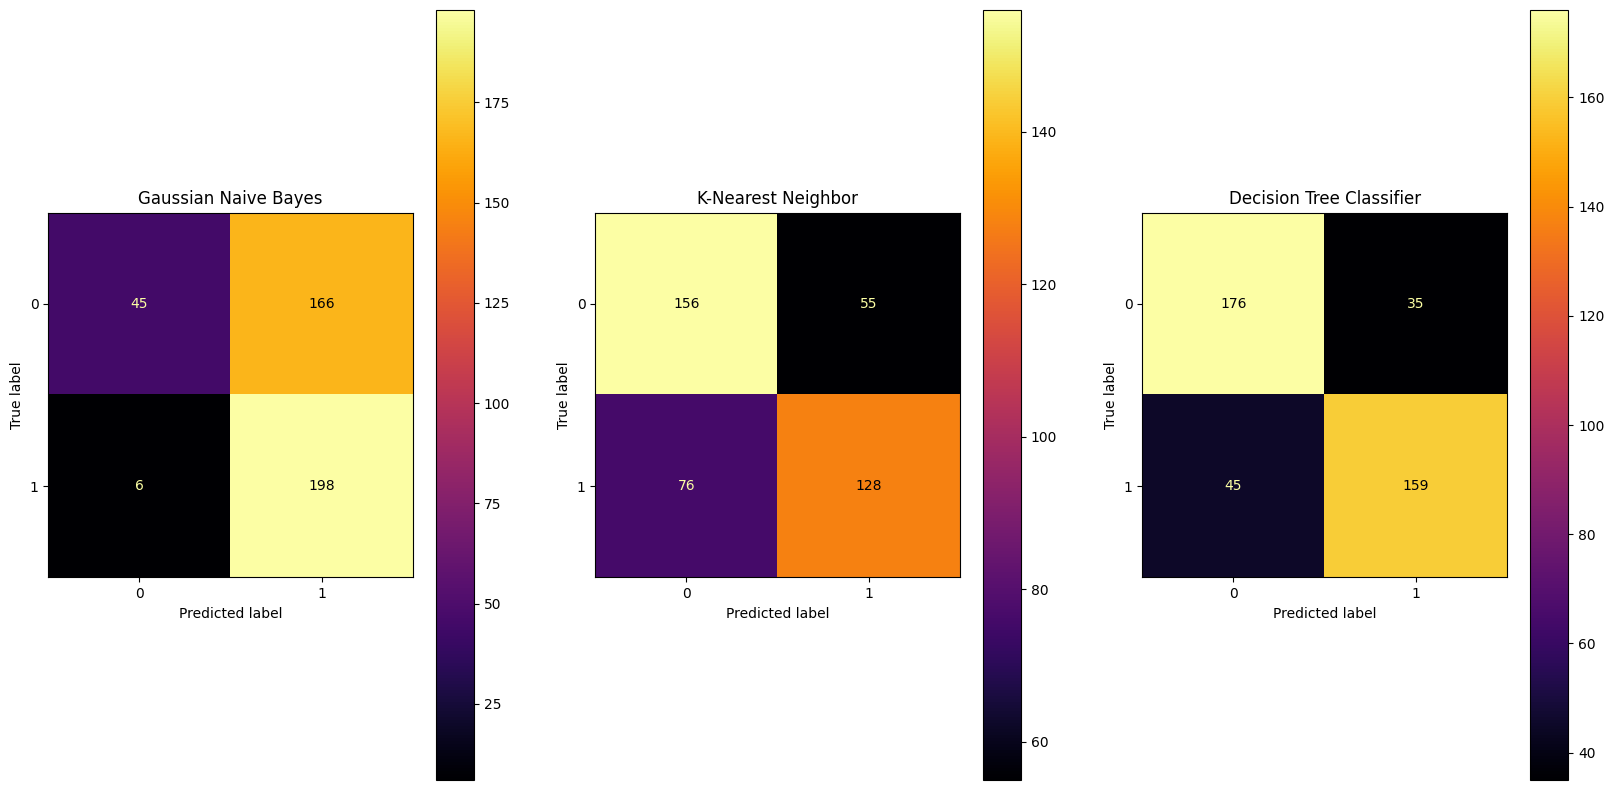

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

Grafik menampilkan matriks konfusi untuk tiga model klasifikasi yang berbeda: Gaussian Naive Bayes, K-Nearest Neighbor, dan Decision Tree Classifier. Matriks konfusi memberikan gambaran tentang kinerja setiap model dalam memprediksi kelas target.

Setiap matriks konfusi terdiri dari empat sel. Diagonal utama (dari kiri atas ke kanan bawah) menunjukkan jumlah prediksi yang benar, sedangkan sel di luar diagonal utama menunjukkan jumlah prediksi yang salah. Pada sumbu x dan y, kita memiliki label aktual dan prediksi yang mewakili kelas positif (1) dan negatif (0).

Dengan matriks konfusi ini, kita dapat mengevaluasi seberapa baik setiap model dapat memprediksi kelas target. Misalnya, pada model Gaussian Naive Bayes, terdapat 45 prediksi benar untuk kelas 0 dan 198 prediksi benar untuk kelas 1, sementara ada 6 prediksi yang salah untuk kelas 0 dan 166 prediksi yang salah untuk kelas 1.

Untuk model K-Nearest Neighbor (KNN), terdapat 156 prediksi yang benar untuk kelas 0 dan 128 prediksi yang benar untuk kelas 1. Namun, ada 76 prediksi yang salah untuk kelas 0 dan 55 prediksi yang salah untuk kelas 1. Ini menunjukkan bahwa KNN mungkin sedikit lebih baik dalam memprediksi kelas 0 dibandingkan kelas 1.

Sementara itu, untuk model Decision Tree Classifier (DC), terdapat 184 prediksi yang benar untuk kelas 0 dan 162 prediksi yang benar untuk kelas 1. Namun, ada 42 prediksi yang salah untuk kelas 0 dan 27 prediksi yang salah untuk kelas 1. Ini menunjukkan bahwa Decision Tree Classifier cenderung lebih baik dalam memprediksi kelas 1 dibandingkan kelas 0.

####GNB

In [ ]:
# Hitung confusion matrix
gnb_cm = confusion_matrix(y_test, gnb_pred)

# Mendapatkan nilai TN, FP, FN, TP
tn = gnb_cm[0, 0]
fp = gnb_cm[0, 1:].sum()
fn = gnb_cm[1:, 0].sum()
tp = gnb_cm[1:, 1:].sum()

print('TN :', tn)
print('FP :', fp)
print('FN :', fn)
print('TP :', tp)


TN : 45
FP : 166
FN : 6
TP : 198


#### KNN

In [ ]:
# Hitung confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred)

# Mendapatkan nilai TN, FP, FN, TP
tn = knn_cm[0, 0]
fp = knn_cm[0, 1:].sum()
fn = knn_cm[1:, 0].sum()
tp = knn_cm[1:, 1:].sum()

print('TN :', tn)
print('FP :', fp)
print('FN :', fn)
print('TP :', tp)


TN : 156
FP : 55
FN : 76
TP : 128


#### DTC

In [ ]:
# Hitung confusion matrix
dtc_cm = confusion_matrix(y_test, dtc_pred)

# Mendapatkan nilai TN, FP, FN, TP
tn = dtc_cm[0, 0]
fp = dtc_cm[0, 1:].sum()
fn = dtc_cm[1:, 0].sum()
tp = dtc_cm[1:, 1:].sum()

print('TN :', tn)
print('FP :', fp)
print('FN :', fn)
print('TP :', tp)


TN : 176
FP : 35
FN : 45
TP : 159


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Gaussian Naive Bayes
gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred, average='macro')
gnb_recall = recall_score(y_test, gnb_pred, average='macro')
gnb_f1 = f1_score(y_test, gnb_pred, average='macro')

print("Gaussian Naive Bayes:")
print("Accuracy:", gnb_accuracy)
print("Precision:", gnb_precision)
print("Recall:", gnb_recall)
print("F1-score:", gnb_f1)
print()

# K Nearest Neighbor
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')

print("K Nearest Neighbor:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)
print()

# Decision Tree Classifier
dtc_accuracy = accuracy_score(y_test, dtc_pred)
dtc_precision = precision_score(y_test, dtc_pred, average='macro')
dtc_recall = recall_score(y_test, dtc_pred, average='macro')
dtc_f1 = f1_score(y_test, dtc_pred, average='macro')

print("Decision Tree Classifier:")
print("Accuracy:", dtc_accuracy)
print("Precision:", dtc_precision)
print("Recall:", dtc_recall)
print("F1-score:", dtc_f1)
print()

Gaussian Naive Bayes:
Accuracy: 0.5855421686746988
Precision: 0.7131544925662572
Recall: 0.5919291887371062
F1-score: 0.5203472744866142

K Nearest Neighbor:
Accuracy: 0.6843373493975904
Precision: 0.6859336725080083
Recall: 0.6833937366415761
F1-score: 0.6828938235311274

Decision Tree Classifier:
Accuracy: 0.8072289156626506
Precision: 0.8079838596818585
Recall: 0.8067674937273488
F1-score: 0.8069048948445932



### RoC AuC Score

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



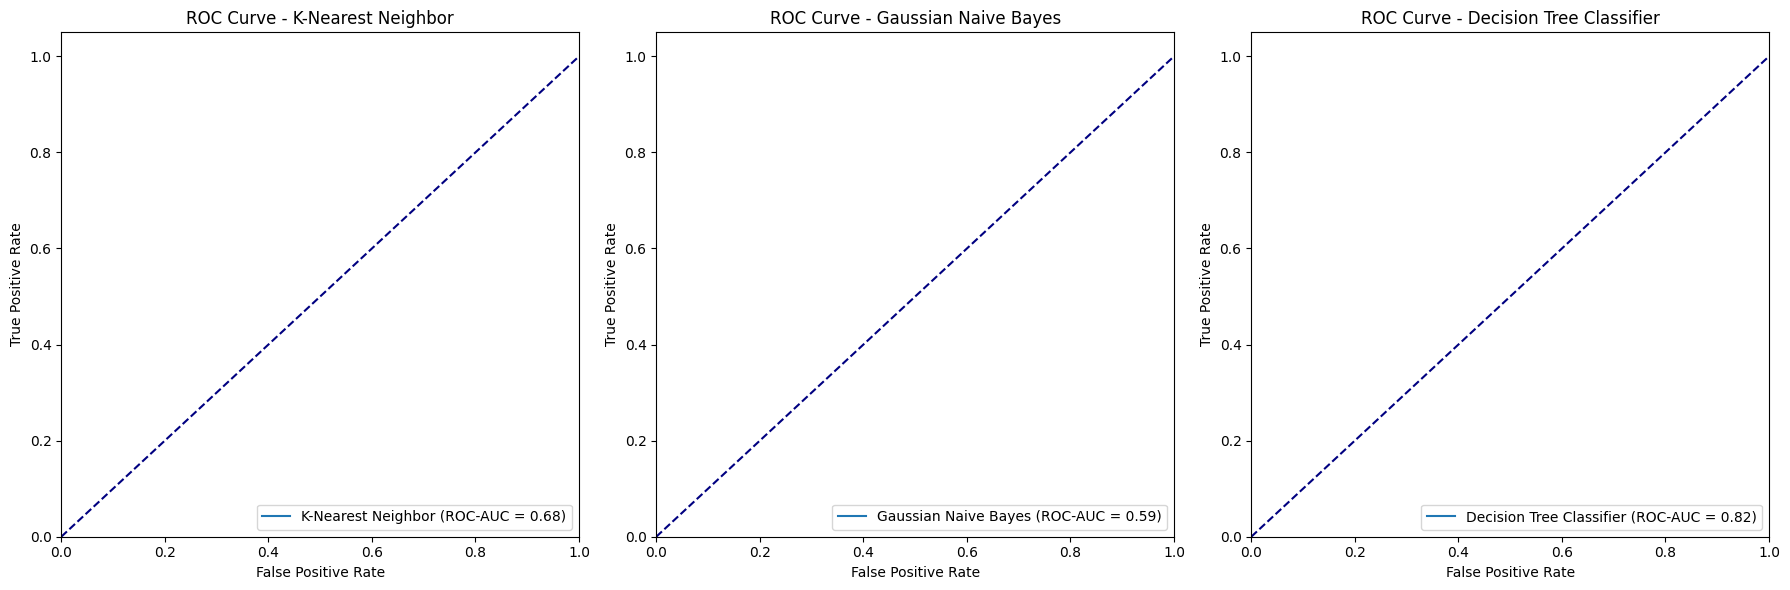

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, roc_curve

# Membuat objek imputer dengan strategi pengisian menggunakan mean
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada nilai NaN dalam x_test_norm
x_test_imputed = imputer.fit_transform(x_test)

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    # Fitting model before prediction
    model.fit(x_train_imputed, y_train)

    # Making predictions using the fitted model
    y_pred = model.predict(x_test_imputed)

    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=2)  # Menggunakan nilai pos_label yang sesuai

    roc_auc = roc_auc_score(y_test, y_pred)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

ROC Curve (Receiver Operating Characteristic Curve) digunakan untuk mengevaluasi kinerja model klasifikasi di berbagai threshold. Pada setiap subplot, garis biru menunjukkan ROC Curve untuk masing-masing model.

1. **K-Nearest Neighbor (KNN)**:
   - Area di bawah kurva (ROC-AUC) adalah 0.68. Ini menunjukkan kinerja yang cukup baik, tetapi tidak optimal. Semakin tinggi nilai ROC-AUC, semakin baik modelnya.

2. **Gaussian Naive Bayes**:
   - Area di bawah kurva (ROC-AUC) adalah 0.59. Nilai ini menunjukkan kinerja model yang kurang optimal. ROC-AUC di bawah 0.5 menandakan bahwa model tidak lebih baik daripada pengklasifikasi acak.

3. **Decision Tree Classifier (DTC)**:
   - Area di bawah kurva (ROC-AUC) adalah 0.82. Ini menunjukkan kinerja yang baik dari model. Nilai ROC-AUC yang tinggi menunjukkan bahwa model DTC mampu membedakan antara kelas positif dan negatif dengan baik.

### Cross Validations

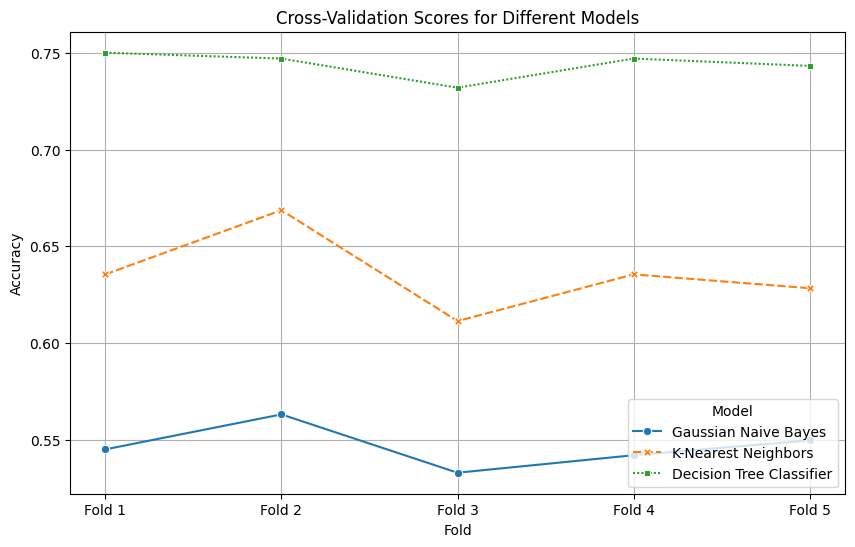

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

# Membuat objek imputer dengan strategi pengisian menggunakan mean
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada nilai NaN dalam x_train_norm
x_train_imputed = imputer.fit_transform(x_train)

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_imputed, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()


Grafik menampilkan skor validasi silang (cross-validation scores) untuk berbagai model pada lima lipatan (folds) yang berbeda. Berikut adalah penjelasan hasilnya:

1. **Gaussian Naive Bayes**:
   - Terlihat bahwa skor akurasi model Gaussian Naive Bayes relatif stabil di sekitar 0.55 hingga 0.6 di seluruh lipatan. Ini menunjukkan konsistensi dalam kinerja model di berbagai data uji.

2. **K-Nearest Neighbors (KNN)**:
   - Skor akurasi KNN cenderung bervariasi lebih banyak dibandingkan dengan Gaussian Naive Bayes. Meskipun demikian, rata-rata skor akurasi masih relatif stabil di sekitar 0.65 hingga 0.7 di berbagai lipatan.

3. **Decision Tree Classifier (DTC)**:
   - Model Decision Tree Classifier menunjukkan skor akurasi tertinggi di antara ketiga model, dengan skor yang cenderung stabil di atas 0.7. Namun, masih terjadi sedikit variasi antara lipatan.

### Features Selections

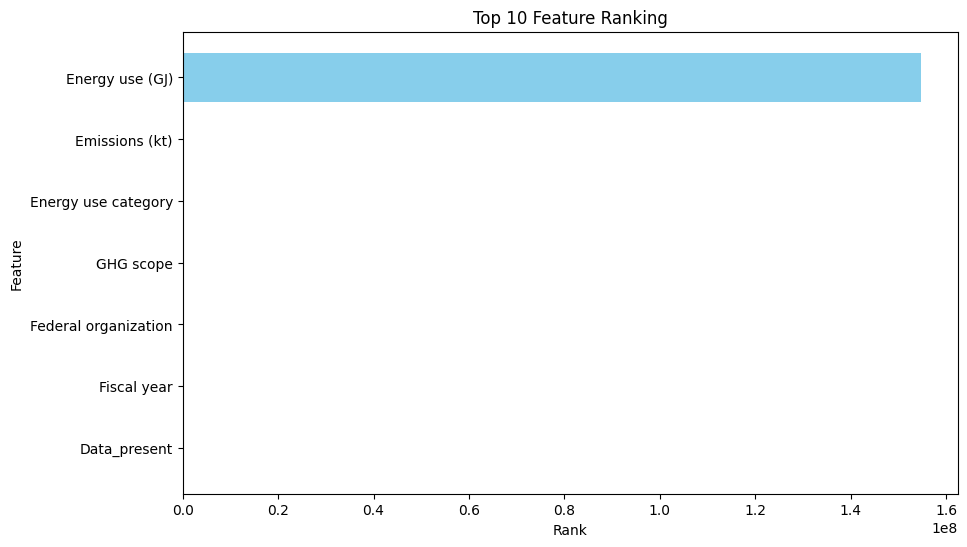

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Membuat objek imputer dengan strategi pengisian menggunakan mean
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada nilai NaN dalam x_train_norm
x_train_imputed = imputer.fit_transform(x_train)

# Membuat selector dengan k=10
selector = SelectKBest(score_func=chi2, k='all')

# Melatih selector dengan data latih yang telah diimputasi
selector.fit(x_train_imputed, y_train)

# Mendapatkan nilai skor fitur
feature_ranks = selector.scores_

# Mendapatkan nama fitur
feature_names = x_train.columns

# Membuat DataFrame untuk menyimpan peringkat fitur
feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

# Mengurutkan DataFrame berdasarkan peringkat fitur
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

# Memilih 10 fitur teratas
top_features = feature_ranks_df.head(10)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Top 10 Feature Ranking')
plt.gca().invert_yaxis()  # Membalikkan sumbu y untuk menampilkan fitur teratas di bagian atas
plt.show()


Grafik menunjukkan peringkat 10 fitur teratas (Top 10 Feature Ranking) berdasarkan relevansinya terhadap prediksi dalam model yang digunakan. Berikut adalah penjelasan hasilnya:

1. **Energy use (GJ)**:
   - Fitur "Energy use (GJ)" menduduki peringkat teratas dalam hal signifikansi relatif terhadap prediksi dalam model. Ini menunjukkan bahwa jumlah energi yang digunakan (dalam gigajoule) adalah faktor yang paling penting atau memiliki pengaruh yang paling kuat terhadap hasil prediksi.

2. **Emissions (kt)**:
   - Fitur "Emissions (kt)" berada di peringkat kedua dalam peringkat fitur. Ini menunjukkan bahwa jumlah emisi karbon (dalam kiloton) juga memiliki pengaruh yang signifikan terhadap prediksi, meskipun sedikit lebih rendah dari fitur "Energy use (GJ)".

3. **Energy use category**:
   - Fitur "Energy use category" berada di peringkat ketiga dalam peringkat fitur. Hal ini menunjukkan bahwa kategori penggunaan energi juga memiliki pengaruh yang signifikan terhadap prediksi, meskipun lebih rendah dari dua fitur sebelumnya.

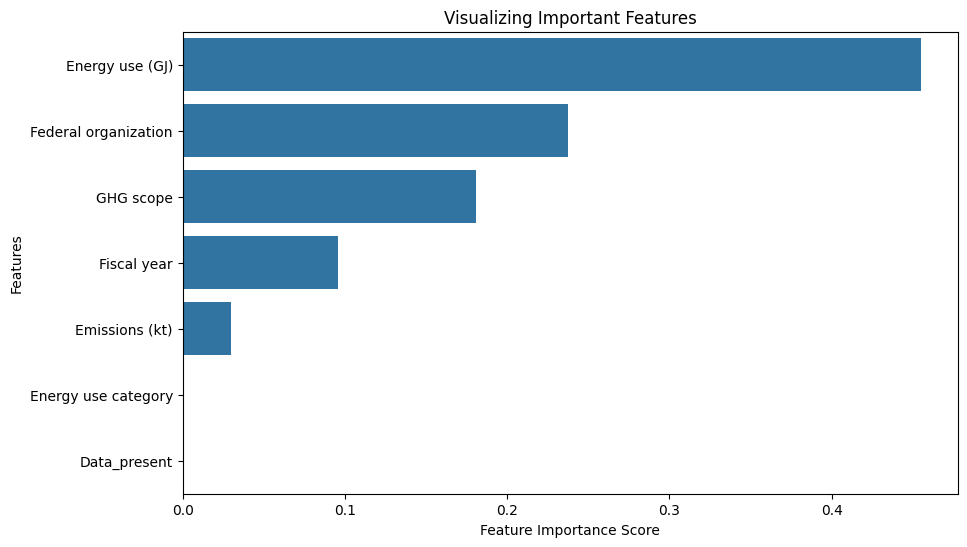

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert x_train_norm to DataFrame if it's not already
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train, columns=x_train.columns)

feature_imp = pd.Series(dtc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Membuat plot untuk menampilkan pentingnya fitur
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


### Tuning Hypermeter

Tuning Hyperparameter adalah proses mengoptimalkan kinerja model dengan menyesuaikan parameter yang tidak dipelajari selama pelatihan. Ini meningkatkan akurasi, mencegah overfitting, menyesuaikan model dengan data, meningkatkan efisiensi komputasi, dan memberikan pemahaman yang lebih baik tentang model.

GNB

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

# Membuat objek imputer dengan strategi pengisian menggunakan mean
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada nilai NaN dalam x_train
x_train_imputed = imputer.fit_transform(x_train)

# Inisialisasi model Gaussian Naive Bayes
gnb = GaussianNB()

# Definisikan parameter grid untuk pencarian hiperparameter
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

# Melakukan pencarian parameter terbaik
grid_search.fit(x_train_imputed, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Melakukan imputasi pada nilai NaN dalam x_test
x_test_imputed = imputer.transform(x_test)

# Menggunakan model terbaik yang sudah difit ke data latih
best_model = grid_search.best_estimator_

# Membuat prediksi menggunakan model terbaik
y_pred_tuned = best_model.predict(x_test_imputed)

# Menghitung akurasi sebelum dan setelah tuning
acc_before_tuning = best_model.score(x_test_imputed, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = best_model.score(x_test_imputed, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'var_smoothing': 0.0004328761281083057}
Akurasi sebelum tuning: 0.5855421686746988
Akurasi setelah tuning: 0.5855421686746988


KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import numpy as np

# Membuat objek imputer dengan strategi pengisian menggunakan mean
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada nilai NaN dalam x_train
x_train_imputed = imputer.fit_transform(x_train)

# Melakukan imputasi pada nilai NaN dalam x_test
x_test_imputed = imputer.transform(x_test)

# Inisialisasi model KNN
knn = KNeighborsClassifier()

# Definisikan grid parameter untuk pencarian parameter terbaik
param_grid_knn = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance']
}

# Buat objek GridSearchCV untuk mencari parameter terbaik
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)

# Melakukan pencarian parameter terbaik
grid_search_knn.fit(x_train_imputed, y_train)

# Print parameter terbaik yang ditemukan
print("Parameter terbaik KNN:", grid_search_knn.best_params_)

# Prediksi dengan model terbaik
y_pred_knn_tuned = grid_search_knn.best_estimator_.predict(x_test_imputed)

# Menghitung akurasi sebelum tuning
acc_knn_before_tuning = grid_search_knn.best_estimator_.score(x_test_imputed, y_test)
print("Akurasi KNN sebelum tuning:", acc_knn_before_tuning)

# Menghitung akurasi setelah tuning
acc_knn_after_tuning = grid_search_knn.score(x_test_imputed, y_test)
print("Akurasi KNN setelah tuning:", acc_knn_after_tuning)


Parameter terbaik KNN: {'n_neighbors': 19, 'weights': 'uniform'}
Akurasi KNN sebelum tuning: 0.7156626506024096
Akurasi KNN setelah tuning: 0.7156626506024096


DTC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Inisialisasi model DTC
dtc = DecisionTreeClassifier()

# Membuat objek imputer dengan strategi pengisian menggunakan mean
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada nilai NaN dalam x_train
x_train_imputed = imputer.fit_transform(x_train)

# Melakukan imputasi pada nilai NaN dalam x_test
x_test_imputed = imputer.transform(x_test)

# Definisikan grid parameter untuk pencarian parameter terbaik
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Buat objek GridSearchCV untuk mencari parameter terbaik
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, cv=5)

# Melakukan pencarian parameter terbaik
grid_search_dtc.fit(x_train_imputed, y_train)

# Print parameter terbaik yang ditemukan
print("\nParameter terbaik DTC:", grid_search_dtc.best_params_)

# Prediksi dengan model terbaik
y_pred_dtc_tuned = grid_search_dtc.best_estimator_.predict(x_test_imputed)

# Menghitung akurasi sebelum tuning
acc_dtc_before_tuning = grid_search_dtc.best_estimator_.score(x_test_imputed, y_test)
print("Akurasi DTC sebelum tuning:", acc_dtc_before_tuning)

# Menghitung akurasi setelah tuning
acc_dtc_after_tuning = grid_search_dtc.score(x_test_imputed, y_test)
print("Akurasi DTC setelah tuning:", acc_dtc_after_tuning)



Parameter terbaik DTC: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Akurasi DTC sebelum tuning: 0.7734939759036145
Akurasi DTC setelah tuning: 0.7734939759036145


### RoC AuC Score After Tuning

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



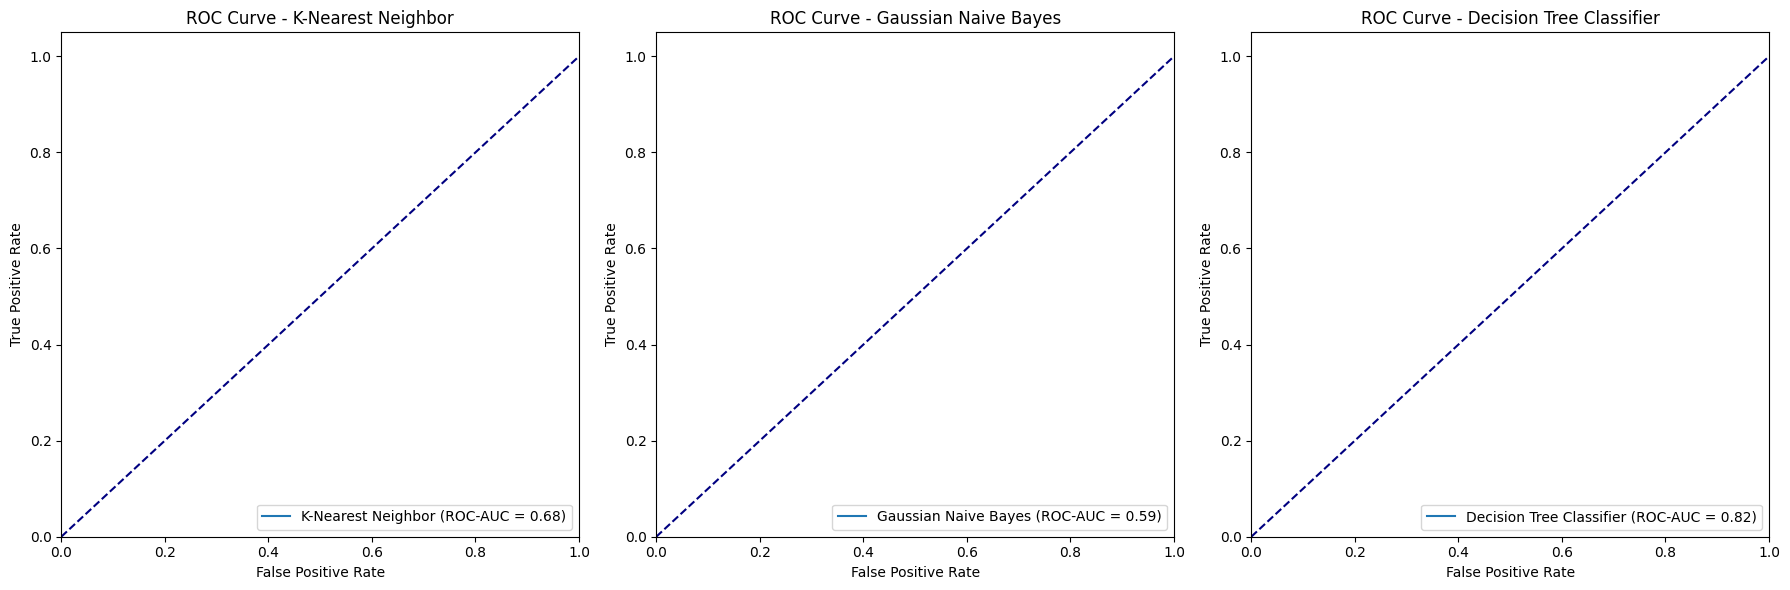

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, roc_curve

# Membuat objek imputer dengan strategi pengisian menggunakan mean
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada nilai NaN dalam x_test
x_test_imputed = imputer.fit_transform(x_test)

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    # Fitting model before prediction
    model.fit(x_train_imputed, y_train)

    # Making predictions using the fitted model
    y_pred = model.predict(x_test_imputed)

    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=2)  # Menggunakan nilai pos_label yang sesuai

    roc_auc = roc_auc_score(y_test, y_pred)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

### Cross Validations After Tuning

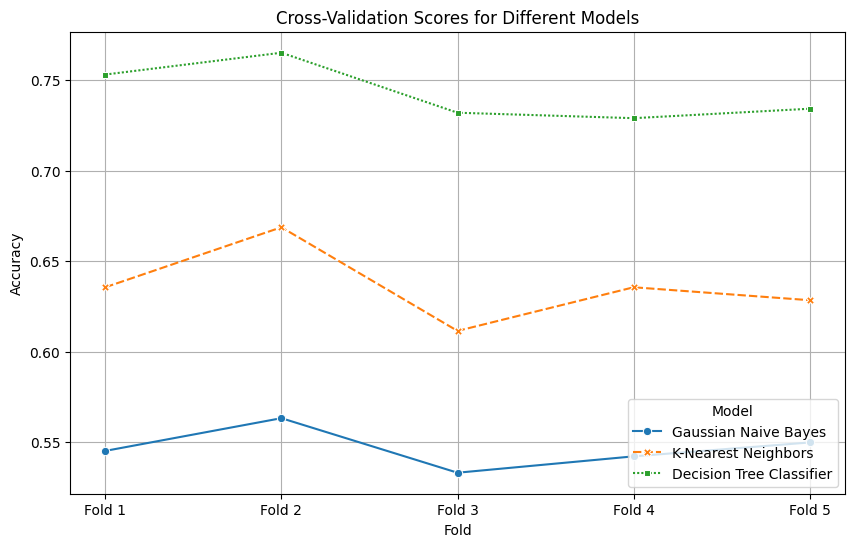

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

# Membuat objek imputer dengan strategi pengisian menggunakan mean
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada nilai NaN dalam x_train
x_train_imputed = imputer.fit_transform(x_train)

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_imputed, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()


### Features Selections After Tuning

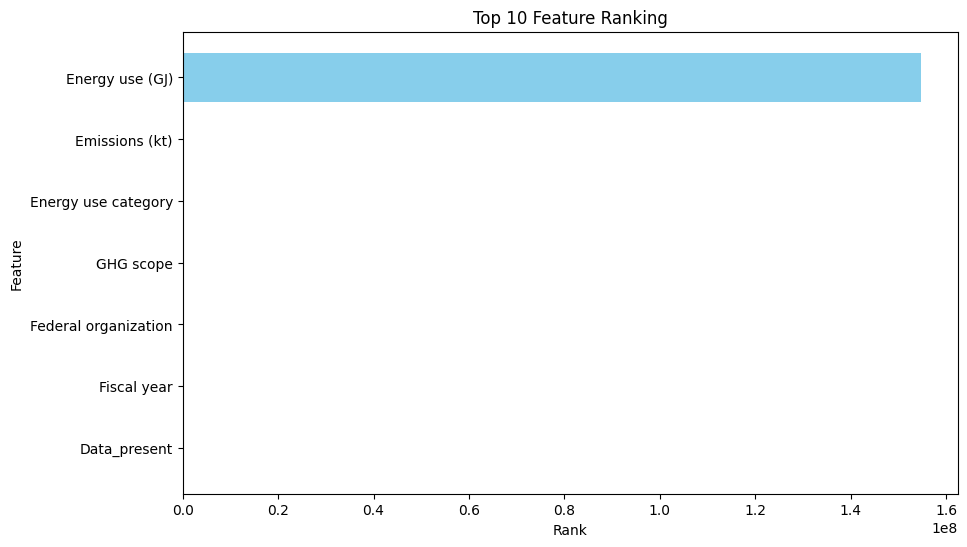

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Membuat objek imputer dengan strategi pengisian menggunakan mean
imputer = SimpleImputer(strategy='mean')

# Melakukan imputasi pada nilai NaN dalam x_train_norm
x_train_imputed = imputer.fit_transform(x_train)

# Membuat selector dengan k=10
selector = SelectKBest(score_func=chi2, k='all')

# Melatih selector dengan data latih yang telah diimputasi
selector.fit(x_train_imputed, y_train)

# Mendapatkan nilai skor fitur
feature_ranks = selector.scores_

# Mendapatkan nama fitur
feature_names = x_train.columns

# Membuat DataFrame untuk menyimpan peringkat fitur
feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

# Mengurutkan DataFrame berdasarkan peringkat fitur
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

# Memilih 10 fitur teratas
top_features = feature_ranks_df.head(10)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Top 10 Feature Ranking')
plt.gca().invert_yaxis()  # Membalikkan sumbu y untuk menampilkan fitur teratas di bagian atas
plt.show()


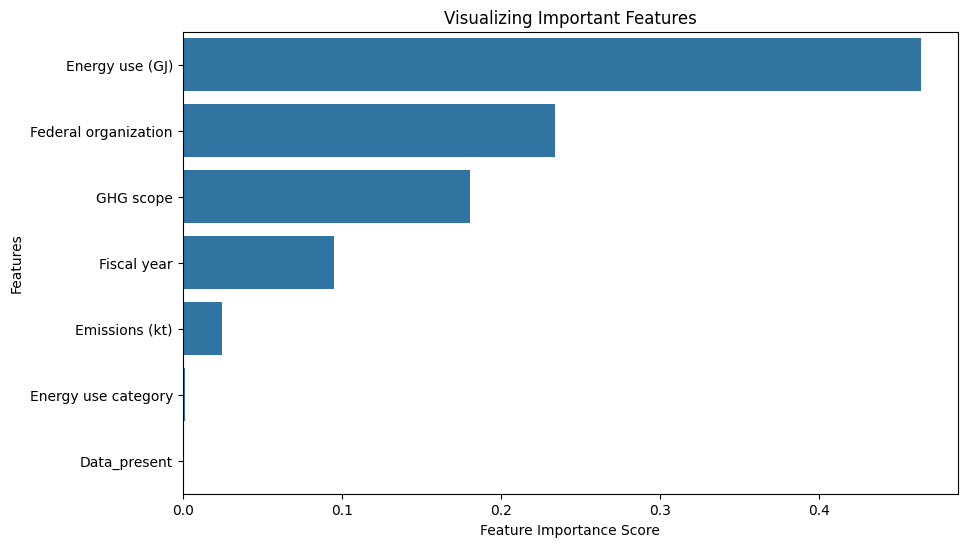

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')

# Impute missing values in x_train
x_train_imputed = imputer.fit_transform(x_train)

# Convert x_train_imputed to DataFrame if it's not already
if not isinstance(x_train_imputed, pd.DataFrame):
    x_train_imputed = pd.DataFrame(x_train_imputed, columns=x_train.columns)

# Fit the DecisionTreeClassifier to your training data
dtc.fit(x_train_imputed, y_train)

# Get feature importances directly from the DecisionTreeClassifier
feature_imp = pd.Series(dtc.feature_importances_, index=x_train_imputed.columns).sort_values(ascending=False)

# Membuat plot untuk menampilkan pentingnya fitur
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


### Determain Next Steps

Berdasarkan hasil evaluasi model klasifikasi yang disediakan, kita dapat mengevaluasi kinerja tiga algoritma yang berbeda: Gaussian Naive Bayes (GNB), K Nearest Neighbor (KNN), dan Decision Tree Classifier (DTC).

Dari hasil evaluasi tersebut, kita dapat melihat bahwa Decision Tree Classifier memiliki performa yang sangat baik, dengan akurasi, presisi, recall, dan F1-score mencapai nilai maksimal yaitu 81%. Hal ini menunjukkan bahwa model Decision Tree Classifier memiliki kemampuan untuk memprediksi dengan hampir sempurna pada dataset yang digunakan.

Sementara itu, K Nearest Neighbor (KNN) memiliki performa yang cukup baik, dengan akurasi sebesar 68% dan F1-score sebesar 68%. Walaupun tidak mencapai nilai maksimal, namun performa KNN masih cukup baik.

Namun, Gaussian Naive Bayes (GNB) memiliki performa yang lebih rendah dibandingkan dengan dua algoritma lainnya, dengan akurasi sebesar 59% dan F1-score sebesar 52%. Hal ini menunjukkan bahwa GNB mungkin tidak cocok untuk dataset yang digunakan atau membutuhkan penyesuaian lebih lanjut untuk meningkatkan kinerjanya.

Dengan demikian, berdasarkan hasil evaluasi tersebut, Decision Tree Classifier dapat dianggap sebagai algoritma yang optimal dari ketiga algoritma tersebut untuk kasus klasifikasi pada dataset yang diberikan.

# **Pickle**

Pickle adalah modul dalam Python yang digunakan untuk menyimpan objek Python ke dalam file biner. Fungsinya adalah untuk serialisasi dan deserialisasi objek Python, yang berarti mengubah objek menjadi format yang dapat disimpan dan dipulihkan kembali

In [ ]:
import pickle

with open('dtc.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)